# 주가 예측
- conda install pandas-datareader
- conda install plotly
- conda install -c conda-forge fbprophet
- conda install yfinance

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'Malgun Gothic'

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from datetime import datetime
from fbprophet import Prophet
import pandas_datareader as pdr 
import yfinance as yf

### 주가 데이터 가져오기
- Nasdaq 'QQQ'

In [4]:
start = datetime(2021, 1, 1)
end = datetime(2021, 6, 30)
#qqq = pdr.DataReader('QQQ', data_source='yahoo', start=start, end=end)
#qqq.tail()

In [5]:
start = datetime(2021, 1, 1)
end = datetime(2021, 7, 2)
qqq = yf.download('QQQ', start=start, end=end)
qqq.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-25,350.470001,350.720001,348.839996,349.459991,349.459991,28682800
2021-06-28,350.779999,353.850006,350.720001,353.709991,353.709991,39130300
2021-06-29,353.529999,355.019989,352.670013,354.989990,354.989990,29426000
2021-06-30,354.829987,355.230011,353.829987,354.429993,354.429993,32724000
2021-07-01,354.070007,355.089996,352.679993,354.570007,354.570007,29262900


- 삼성전자(005930)

In [6]:
sse = yf.download('005930.KS', start=start)
sse.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-28,81700.0,82000.0,81600.0,81900.0,81900.0,11578529
2021-06-29,81900.0,82100.0,80800.0,81000.0,81000.0,15744317
2021-06-30,81100.0,81400.0,80700.0,80700.0,80700.0,13288643
2021-07-01,80500.0,80600.0,80000.0,80100.0,80100.0,13382882
2021-07-02,80000.0,80400.0,79900.0,80100.0,80100.0,4092571


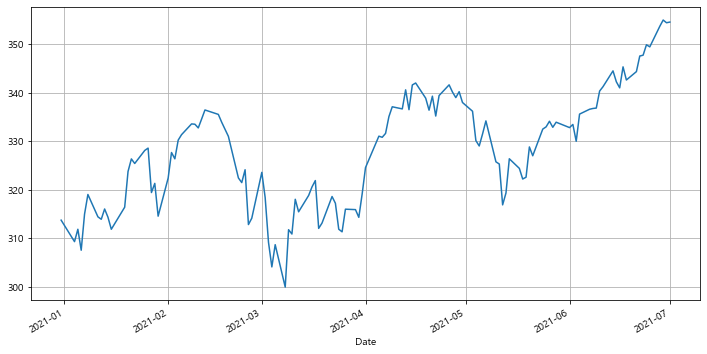

In [7]:
qqq.Close.plot(figsize=(12,6), grid=True)
plt.show()

### Prophet 사용

In [8]:
start = datetime(2016,1,1)
end = datetime(2021,7,1)
qqq = yf.download('QQQ', start=start, end=end)
qqq.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-24,349.730011,351.459991,349.170013,349.890015,349.890015,32581600
2021-06-25,350.470001,350.720001,348.839996,349.459991,349.459991,28682800
2021-06-28,350.779999,353.850006,350.720001,353.709991,353.709991,39130300
2021-06-29,353.529999,355.019989,352.670013,354.989990,354.989990,29426000
2021-06-30,354.829987,355.230011,353.829987,354.429993,354.429993,32724000


In [9]:
df = pd.DataFrame({
    'ds': qqq.index, 'y': qqq.Close
})
df.head()

,ds,y
Date,,
2015-12-31,2015-12-31,111.860001
2016-01-04,2016-01-04,109.500000
2016-01-05,2016-01-05,109.309998
2016-01-06,2016-01-06,108.260002
2016-01-07,2016-01-07,104.870003


In [10]:
df.reset_index(inplace=True)
del df['Date']
df.tail()

,ds,y
1379,2021-06-24,349.890015
1380,2021-06-25,349.459991
1381,2021-06-28,353.709991
1382,2021-06-29,354.989990
1383,2021-06-30,354.429993


In [ ]:
model = Prophet(daily_seasonality=True)
model.fit(df)

In [ ]:
future = model.make_future_dataframe(184)
future.tail()

In [ ]:
forecast = model.predict(future)
model.plot(forecast);

In [ ]:
forecast.head()

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(qqq.index, qqq.Close, label='QQQ real')
plt.plot(forecast.ds, forecast.yhat, label='forecast')
plt.grid()
plt.legend()
plt.show()